# Problem 2

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, inv

def r(p1, p2): 
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def V(r): 
    return 4*((1/r) ** 12 - (1/r) ** 6)

def f(P): 
    res = 0
    for i in range(len(P)): 
        for j in range(len(P)): 
            if i == j: continue
            rij = r(P[i], P[j])
            res += V(rij)
    return res

def dVdr(r): 
    return 4*((-12)*r**(-13)+6*r**(-7))

def helper(r): 
    return 24*(28*r**(-15)-8*r**(-9))

def gradf(P, i): 
    grad = np.zeros(2)
    p1 = P[i]
    for j in range(len(P)): 
        if(i == j): continue
        p2 = P[j]
        
        rij = r(p1, p2)
        
        # chain rule
        grad[0] += dVdr(rij) / rij * (p1[0] - p2[0])
        grad[1] += dVdr(rij) / rij * (p1[1] - p2[1])
            
    return grad

def hessf(P, i): 
    p1 = P[i]
    hess = np.zeros((2, 2))
    for j in range(len(P)): 
        if(i == j): continue
        p2 = P[j]
        rij = r(p1, p2)
        hess[0, 0] += 2 * (helper(rij) / rij) * (p1[0] - p2[0]) ** 2 + dVdr(rij)
        hess[1, 1] += 2 * (helper(rij) / rij) * (p1[1] - p2[1]) ** 2 + dVdr(rij)
        hess[0, 1] += 2 * (helper(rij) / rij) * (p1[1] - p2[1]) * (p1[0] - p2[0])
        hess[1, 0] += 2 * (helper(rij) / rij) * (p1[1] - p2[1]) * (p1[0] - p2[0])
    return hess
        

def backTr(alpha, Pn, direction, i):
    '''
    Backtracking algorithm
    '''
    fn = f(Pn) 
    Pn_1 = Pn.copy()
    Pn_1[i][0] = Pn[i][0] + alpha*direction[0]
    Pn_1[i][1] = Pn[i][1] + alpha*direction[1]
    fn_1 = f(Pn_1)
    while fn < fn_1:
        alpha = alpha*beta
        Pn_1 = Pn.copy()
        Pn_1[i][0] = Pn[i][0] + alpha*direction[0]
        Pn_1[i][1] = Pn[i][1] + alpha*direction[1]
        fn_1 = f(Pn_1)
        if alpha <= 1e-8 and alpha > 0:
            alpha = -1
    return alpha

def newton(P0):
    Pn = P0
    epoch = 0
    while epoch < maxIter:
        flag = False
        for i in range(len(Pn)):
            Hess = hessf(Pn, i) 
            g = gradf(Pn, i)
            d = -inv(Hess) @ g
            if norm(d) <= tol:
                flag = True
            alpha = backTr(alpha0, Pn, d, i)
            Pn[i][0] = Pn[i][0] + alpha*d[0]
            Pn[i][1] = Pn[i][1] + alpha*d[1]
        if flag:
            break
        epoch += 1
        
    return Pn


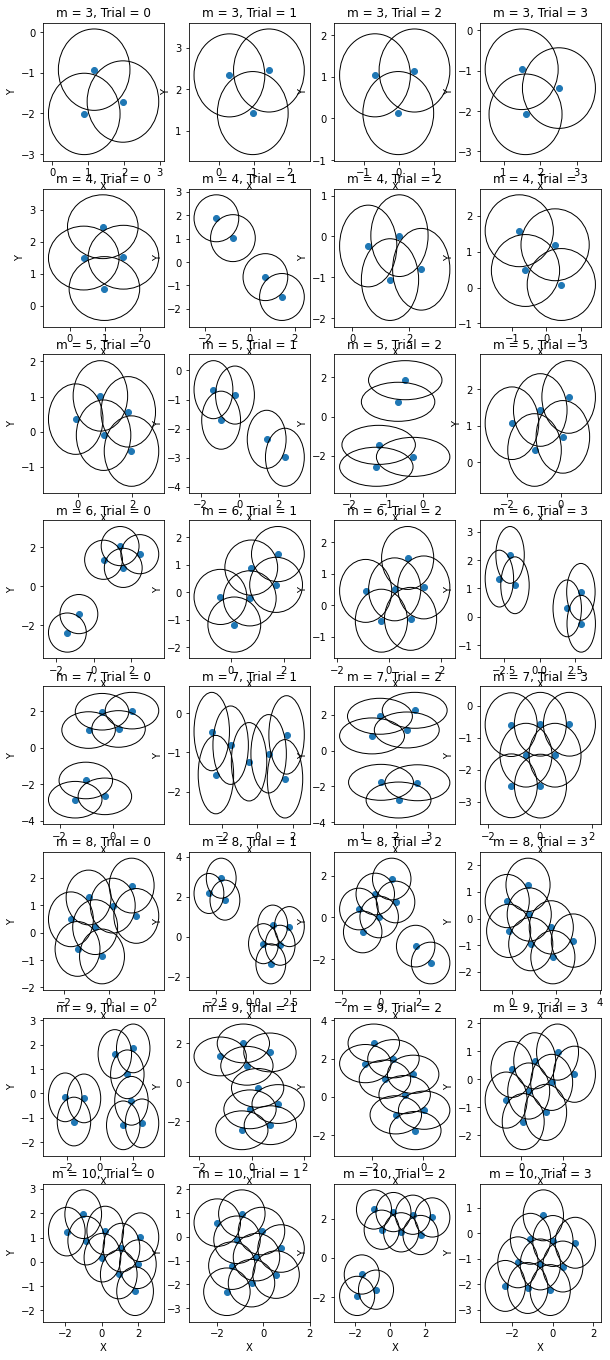

In [55]:
maxIter = 100
tol = 1e-8
m = 3
alpha0 = 1
beta = 0.8

fig = plt.figure(figsize = (10, 30))

for m in range(3, 11):
    for trial in range(4):
        P0 = np.random.uniform(low = -3, high = 3, size=(m, 2))
        P = newton(P0)
        ax = fig.add_subplot(10, 4, (m - 3) * 4 + trial + 1)
        ax.scatter(P[:,0], P[:,1])
        for i in range(m):
            circle = plt.Circle((P[i,0],P[i,1]), radius = 1, fill = False)
            ax.add_patch(circle)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title("m = {:d}, Trial = {:d}".format(m, trial))

This code plots the 4 trials with different starting point under m from 3 to 10. As shown, each trial of every m attains a quite different local minimum, indicating that there are many of them. 